IMPORTAÇÃO DE BIBLIOTECAS

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from perceptron import *

LEITURA DO DATASET

In [6]:
# Leitura do arquivo dataAll.txt
data = np.fromfile("datasets/dataAll.txt", dtype=float)
print(data.shape)

(3000,)


TRATAMENTO DO DATASET

In [7]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(1000, 3)



In [8]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(1000,)


In [9]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(1000, 3)


APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [447]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[ 0.34998431 -0.32369691  0.08284747]


In [448]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca, s = treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta)

Peso: [ 0.34998431 -0.32369691  0.08284747]
Pesos:  [  0.44998431  36.05514309 -24.33138253]
Pesos:  [   0.54998431  -17.60390691 -100.82713253]
Pesos:  [  0.44998431  55.19211309 -64.99757253]
Pesos:  [  0.34998431 137.79081309  14.85825747]
Pesos:  [  0.44998431 143.63657309 -63.43633253]
Pesos:  [   0.54998431  103.62766309 -141.32902253]
Pesos:  [  0.64998431 157.29747309 -92.23675253]
Pesos:  [   0.54998431  104.33741309 -149.10621253]
Pesos:  [  0.64998431 163.89693309 -98.98388253]
Pesos:  [   0.54998431  118.37230309 -164.61981253]
Pesos:  [  0.64998431 209.08816309 -89.90649253]
Pesos:  [   0.54998431  151.30717309 -150.21464253]
Pesos:  [   0.44998431  103.04061309 -198.68436253]
Pesos:  [   0.34998431  173.48796309 -156.56809253]
Pesos:  [   0.24998431  126.64596309 -207.97796253]
Pesos:  [ 1.49984309e-01  1.96509593e+02 -1.43759023e+02]
Pesos:  [   0.24998431  140.67386309 -199.93655253]
Pesos:  [ 1.49984309e-01  2.17661333e+02 -1.35087223e+02]
Pesos:  [ 4.99843088e-02  1.8

In [449]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  3
Pesos finais:  [-5.00156912e-02  2.18478843e+02 -2.17649403e+02]
Total de ajustes de pesos: 72


GRÁFICO DA SOLUÇÃO

In [450]:
# Criando a lista de cores
cores = criar_cores(saidas)
# Cálculo dos coeficientes da linha de decisão
b = pesos[0]/pesos[2]
a = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = int(math.ceil(min(entradas[:,1])))
maior = int(math.ceil(max(entradas[:,1])))
for i in range(menor, maior, 1):
    x.append(i)
    valor = b + a*(i)
    y.append(valor)
print(a, b)

1.003810902090109 0.0002297993497703677


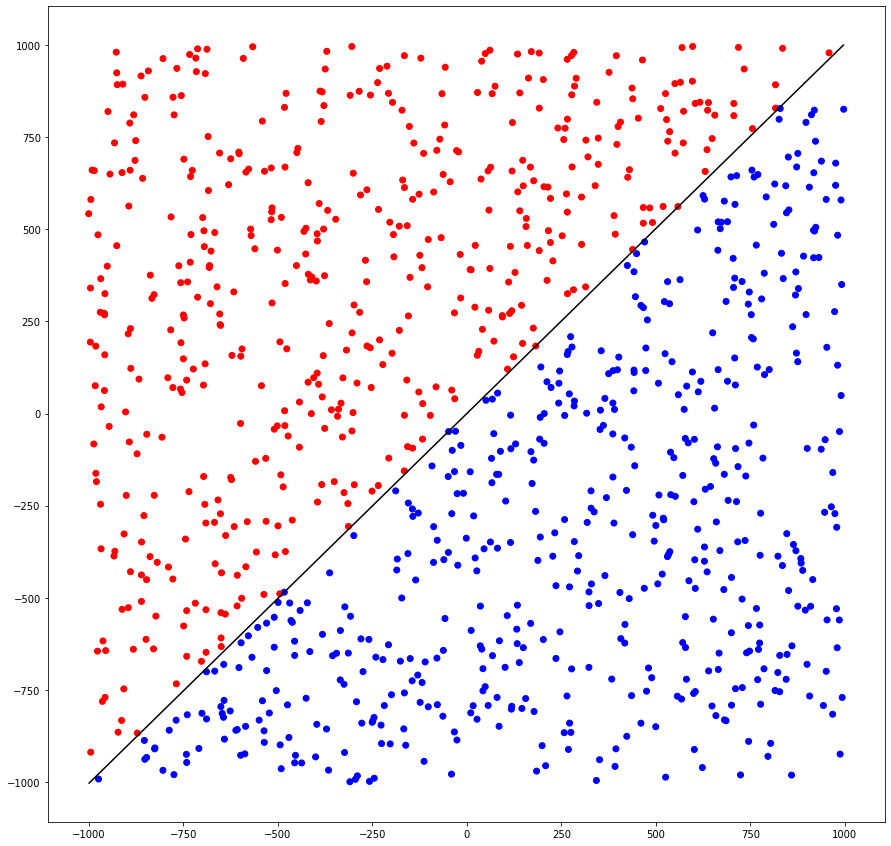

In [451]:
# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.pyplot.plot(x, y, color="black", markersize=100)
plt.pyplot.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.pyplot.show()

FUNÇÕES

In [452]:
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

In [453]:
def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

In [454]:
def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores